In [78]:
#https://www.data.gouv.fr/fr/datasets/r/85bf035f-733e-4e6d-b591-c865192d0849
import pandas as pd
import numpy as np
import urllib.request
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk

In [2]:
# URL à charger
url = "https://www.data.gouv.fr/fr/datasets/r/85bf035f-733e-4e6d-b591-c865192d0849"

# Nom de fichier local à charger si l'URL n'est pas disponible
filename = "retraite.xlsx"

try:
    # Vérifier si l'URL est disponible
    urllib.request.urlopen(url)
    # Si l'URL est disponible, charger le contenu du fichier Excel
    data = pd.read_excel(url)
    print('Lecture via l\'URL')
except:
    # Si l'URL n'est pas disponible, charger le contenu du fichier local
    data = pd.read_excel(filename)
    print('Lecture via le fichier')

Lecture via le fichier


In [3]:
data

,"PANORAMA STATISTIQUE de la cohésion sociale, du travail et de l’emploi 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 - Données générales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Source : Insee, Estimations de population (rés...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,Vaucluse,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière
4,Superficie en km²,69711,5762,7340,5529,5726,6530,7431,4781,4977,...,3567.13,543962.83,86339,1705,1100,83534,2877,2503,374,633178.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,10.02,6.66,9.28,11,8.55,7.63,nd,7.54,nd,6.7
145,Proportion parmi les retraités en cumul emploi...,19.48,15.46,22.72,17.23,23.43,22.2,19.26,18.49,23.66,...,21.15,18.33,12.42,15.01,7.87,18.33,nd,14.57,nd,18.26
146,"(1) 2017 pour Mayotte, 2018 pour les autres te...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Définir la chaîne de caractères à rechercher
search_string = "AUVERGNE-\nRHÔNE-ALPES"
# Initialiser un tableau pour stocker les numéros de lignes
start = []

# Parcourir chaque colonne du DataFrame
for col in data.columns:
    # Appliquer une lambda fonction à la colonne pour localiser les numéros de lignes qui contiennent la chaîne de caractères
    line_numbers_in_col = data.index[data[col].apply(lambda x: search_string in str(x))].tolist()
    # Ajouter les numéros de lignes trouvées à la liste
    start += line_numbers_in_col

# Supprimer les doublons des numéros de lignes et trier la liste
start = list(set(start))
start.sort()

# Afficher les numéros de lignes trouvées
print(start)

[3, 25, 43, 68, 110]


In [5]:
# Initialiser un tableau pour stocker les numéros de lignes
end = []

# Parcourir chaque colonne du DataFrame
for col in data.columns:
    # Appliquer une lambda fonction à la colonne pour localiser les numéros de lignes qui commencent par '(1)'
    line_numbers_in_col = data.index[data[col].apply(lambda x: isinstance(x, str) and x.startswith('(1)'))].tolist()
    # Ajouter les numéros de lignes trouvées à la liste
    end += line_numbers_in_col

# Supprimer les doublons des numéros de lignes et trier la liste
end = list(set(end))
end.sort()

# Afficher les numéros de lignes trouvées
print(end)

[17, 36, 63, 105, 146]


In [6]:
# Décomposer le DataFrame en 5 DataFrames différents
dfs = []
for i in range(len(start)):
    dfs.append(data.iloc[start[i]-1:end[i]])

# Renommer les colonnes de chaque DataFrame
for i, df in enumerate(dfs):
    column_names = df.iloc[1]
    df = df[2:]
    df.columns = column_names
    df = df.reset_index(drop=True)
    df = df.rename_axis("", axis=1)
    dfs[i] = df
    dfs[i] = df.rename(columns={df.columns[-1]: "France entière"})

# Assigner chaque DataFrame à une variable
df1, df2, df3, df4, df5 = dfs
df_concat = pd.concat(dfs)
df_concat = df_concat.reset_index(drop=True)
df_concat = df_concat.rename(columns={df_concat.columns[0]: "Designation"})

In [7]:
df_concat

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,Vaucluse,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière
0,Superficie en km²,69711,5762,7340,5529,5726,6530,7431,4781,4977,...,3567.13,543962.83,86339,1705,1100,83534,2877,2503,374,633178.83
1,Population au 1er janvier 2019 (Recensement de...,8042936,652432,335975,328278,144692,516762,1271166,765634,227570,...,561469,65096768,1030425,384239,364508,281678,1130789,861210,269579,67257982
2,Population au 1er janvier 2022 (Estimation de ...,8153233,665391,331757,330865,143280,524506,1285915,767549,227224,...,562928,65627454,1017748,372939,350373,294436,1168194,868846,299348,67813396
3,Population étrangère au 1er janvier 2019 (Rece...,553830,57984,11559,11874,2625,26696,81904,48845,5495,...,42709,4603992,nd,nd,nd,nd,nd,nd,124618,nd
4,Projection de la population en 2050 en millier...,9472,841,353,384,143,597,1511,834,246,...,593,71622,997,330,282,385,1400,910,490,74019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Proportion parmi l'ensemble des actifs occupés...,17.63,15.79,9.84,11.02,8.09,13.86,20.06,12.97,9.15,...,13.37,18.56,12.01,11.56,11.76,13.26,nd,11.69,nd,18.41
109,Proportion parmi les retraités en cumul emploi...,16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,...,16.75,18.85,9.7,10.08,9.07,10.42,nd,15.55,nd,18.76
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,10.02,6.66,9.28,11,8.55,7.63,nd,7.54,nd,6.7


In [8]:
df_concat.shape

(113, 119)

In [9]:
df1.shape

(13, 119)

In [10]:
df2.shape

(10, 119)

In [11]:
df3.shape

(19, 119)

In [12]:
df4.shape

(36, 119)

In [13]:
df5.shape

(35, 119)

In [14]:
print(df_concat.isnull().sum())


Designation                0
AUVERGNE-\nRHÔNE-ALPES    14
Ain                       14
Allier                    14
Ardèche                   14
                          ..
Guyane                    14
OCEAN INDIEN              14
La Réunion                14
Mayotte                   14
France entière            14
Length: 119, dtype: int64


In [15]:
df_concat['new_designation'] = df_concat['Designation']

for i in range(len(df_concat)-2):
    if 'Espérance de vie à 65 ans en 2021' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
    if 'Espérance de vie à la naissance en 2021' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
    if 'Statut d\'emploi et type de contrat des 50 à 64 ans en emploi (en %)' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']
        df_concat.loc[i+5, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+5, 'Designation']
        df_concat.loc[i+6, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+6, 'Designation']
    if 'Secteur d\'activité des 50 à 64 ans en emploi (en %)' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']
        df_concat.loc[i+5, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+5, 'Designation']
    if 'Catégorie socioprofessionnelle des 50 à 64 ans en emploi (en %)' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']
        df_concat.loc[i+5, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+5, 'Designation']
        df_concat.loc[i+6, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+6, 'Designation']
    
    if 'Cumul emploi-retraite (en %)' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']
    
    if 'Répartition des retraités et préretraités exerçant un emploi selon leur tranche d’âge en %' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']
        df_concat.loc[i+5, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+5, 'Designation']
    if 'Répartition des retraités et préretraités exerçant un emploi selon leur catégorie socioprofessionnelle en %' in df_concat.loc[i, 'Designation']:
        print(i)
        df_concat.loc[i+1, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+1, 'Designation']
        df_concat.loc[i+2, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+2, 'Designation']
        df_concat.loc[i+3, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+3, 'Designation']
        df_concat.loc[i+4, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+4, 'Designation']        
        df_concat.loc[i+5, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+5, 'Designation']
        df_concat.loc[i+6, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+6, 'Designation']
        df_concat.loc[i+7, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+7, 'Designation']
        df_concat.loc[i+8, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+8, 'Designation']
        df_concat.loc[i+9, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+9, 'Designation']
        df_concat.loc[i+10, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+10, 'Designation']
        df_concat.loc[i+11, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+11, 'Designation']
        df_concat.loc[i+12, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+12, 'Designation']
        df_concat.loc[i+13, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+13, 'Designation']
        df_concat.loc[i+14, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+14, 'Designation']
        df_concat.loc[i+15, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+15, 'Designation']
        df_concat.loc[i+16, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+16, 'Designation']
        df_concat.loc[i+17, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+17, 'Designation']
        df_concat.loc[i+18, 'new_designation'] = df_concat.loc[i, 'Designation'] + ' ' + df_concat.loc[i+18, 'Designation']



17
20
52
59
65
80
85
94


In [16]:
df_concat[16:47]

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
16,Indice de vieillissement de la population au 1...,86.617699,73.952419,145.278776,122.679903,158.800853,96.839383,77.713269,95.815684,116.771337,...,90.659138,nd,93.134256,111.226575,16.468113,nd,48.542759,4.94641,88.695517,Indice de vieillissement de la population au 1...
17,Espérance de vie à la naissance en 2021 (1) (3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Espérance de vie à la naissance en 2021 (1) (3)
18,Hommes,80.9,81.2,78.4,80.2,78.2,80.2,81.3,80.8,79.6,...,79.4,nd,72.9,74,72.7,nd,76.7,72.5,79.3,Espérance de vie à la naissance en 2021 (1) (3...
19,Femmes,86.1,86.2,85.2,85.5,85.3,86,86.4,85.9,85.5,...,85.5,nd,79.9,81.4,80,nd,83.4,73.9,85.4,Espérance de vie à la naissance en 2021 (1) (3...
20,Espérance de vie à 65 ans en 2021 (1) (3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Espérance de vie à 65 ans en 2021 (1) (3)
21,Hommes,19.7,19.6,19.1,19.5,18,19.5,19.9,19.6,19.4,...,19.2,nd,16.8,17.1,16.7,nd,18.3,13.9,19.1,Espérance de vie à 65 ans en 2021 (1) (3) Hommes
22,Femmes,23.4,23.3,23.2,23.3,23.1,23.6,23.4,23.2,22.7,...,23.2,nd,20.6,20.9,20.3,nd,22,14.7,23.2,Espérance de vie à 65 ans en 2021 (1) (3) Femmes
23,0 - 4 ans,432159,38379,13724,14801,5330,26630,68897,40280,10298,...,3401295,64825,18516,15725,30584,104623,57556,47067,3570743,0 - 4 ans
24,5 - 9 ans,489098,43599,16320,17526,6418,31331,79796,46648,12027,...,3833417,68391,20498,17399,30494,106861,62916,43945,4008669,5 - 9 ans
25,10 - 14 ans,518413,46236,17942,19808,7298,34371,85816,49410,13683,...,4089693,73617,23250,19936,30431,106600,66572,40028,4269910,10 - 14 ans


In [17]:
df_concat.columns.tolist()

['Designation',
 'AUVERGNE-\nRHÔNE-ALPES',
 'Ain',
 'Allier',
 'Ardèche',
 'Cantal',
 'Drôme',
 'Isère',
 'Loire',
 'Haute-Loire',
 'Puy-de-Dôme',
 'Rhône',
 'Savoie',
 'Haute-Savoie',
 'BOURGOGNE-\nFRANCHE-COMTE',
 "Côte-d'Or",
 'Doubs',
 'Jura',
 'Nièvre',
 'Haute-Saône',
 'Saône-et-Loire',
 'Yonne',
 'Territoire de Belfort',
 'BRETAGNE',
 "Côtes d'Armor",
 'Finistère',
 'Ille-et-Vilaine',
 'Morbihan',
 'CENTRE - \nVAL DE LOIRE',
 'Cher',
 'Eure-et-Loir',
 'Indre',
 'Indre-et-Loire',
 'Loir-et-Cher',
 'Loiret',
 'CORSE',
 'Corse du sud',
 'Haute Corse',
 'GRAND EST',
 'Ardennes',
 'Aube',
 'Marne',
 'Haute-Marne',
 'Meurthe-et-Moselle',
 'Meuse',
 'Moselle',
 'Bas-Rhin',
 'Haut-Rhin',
 'Vosges',
 'HAUTS-DE-FRANCE ',
 'Aisne',
 'Nord',
 'Oise',
 'Pas-de-Calais',
 'Somme',
 'ILE-DE-FRANCE',
 'Paris',
 'Seine-et-Marne',
 'Yvelines',
 'Essonne',
 'Hauts-de-Seine',
 'Seine-Saint-Denis',
 'Val-de-Marne',
 "Val-d'Oise",
 'NORMANDIE',
 'Calvados',
 'Eure',
 'Manche',
 'Orne',
 'Seine-Maritim

In [18]:
df_concat

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
0,Superficie en km²,69711,5762,7340,5529,5726,6530,7431,4781,4977,...,543962.83,86339,1705,1100,83534,2877,2503,374,633178.83,Superficie en km²
1,Population au 1er janvier 2019 (Recensement de...,8042936,652432,335975,328278,144692,516762,1271166,765634,227570,...,65096768,1030425,384239,364508,281678,1130789,861210,269579,67257982,Population au 1er janvier 2019 (Recensement de...
2,Population au 1er janvier 2022 (Estimation de ...,8153233,665391,331757,330865,143280,524506,1285915,767549,227224,...,65627454,1017748,372939,350373,294436,1168194,868846,299348,67813396,Population au 1er janvier 2022 (Estimation de ...
3,Population étrangère au 1er janvier 2019 (Rece...,553830,57984,11559,11874,2625,26696,81904,48845,5495,...,4603992,nd,nd,nd,nd,nd,nd,124618,nd,Population étrangère au 1er janvier 2019 (Rece...
4,Projection de la population en 2050 en millier...,9472,841,353,384,143,597,1511,834,246,...,71622,997,330,282,385,1400,910,490,74019,Projection de la population en 2050 en millier...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Proportion parmi l'ensemble des actifs occupés...,17.63,15.79,9.84,11.02,8.09,13.86,20.06,12.97,9.15,...,18.56,12.01,11.56,11.76,13.26,nd,11.69,nd,18.41,Répartition des retraités et préretraités exer...
109,Proportion parmi les retraités en cumul emploi...,16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,...,18.85,9.7,10.08,9.07,10.42,nd,15.55,nd,18.76,Répartition des retraités et préretraités exer...
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Répartition des retraités et préretraités exer...
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,6.66,9.28,11,8.55,7.63,nd,7.54,nd,6.7,Répartition des retraités et préretraités exer...


In [19]:
df_concat = df_concat.replace('nd', np.nan)

In [20]:
df_concat

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
0,Superficie en km²,69711.00,5762.00,7340.00,5529.00,5726.00,6530.00,7431.00,4781.00,4977.00,...,543962.83,86339.00,1705.00,1100.00,83534.00,2877.0,2503.00,374.0,633178.83,Superficie en km²
1,Population au 1er janvier 2019 (Recensement de...,8042936.00,652432.00,335975.00,328278.00,144692.00,516762.00,1271166.00,765634.00,227570.00,...,65096768.00,1030425.00,384239.00,364508.00,281678.00,1130789.0,861210.00,269579.0,67257982.00,Population au 1er janvier 2019 (Recensement de...
2,Population au 1er janvier 2022 (Estimation de ...,8153233.00,665391.00,331757.00,330865.00,143280.00,524506.00,1285915.00,767549.00,227224.00,...,65627454.00,1017748.00,372939.00,350373.00,294436.00,1168194.0,868846.00,299348.0,67813396.00,Population au 1er janvier 2022 (Estimation de ...
3,Population étrangère au 1er janvier 2019 (Rece...,553830.00,57984.00,11559.00,11874.00,2625.00,26696.00,81904.00,48845.00,5495.00,...,4603992.00,NaN,NaN,NaN,NaN,NaN,NaN,124618.0,NaN,Population étrangère au 1er janvier 2019 (Rece...
4,Projection de la population en 2050 en millier...,9472.00,841.00,353.00,384.00,143.00,597.00,1511.00,834.00,246.00,...,71622.00,997.00,330.00,282.00,385.00,1400.0,910.00,490.0,74019.00,Projection de la population en 2050 en millier...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Proportion parmi l'ensemble des actifs occupés...,17.63,15.79,9.84,11.02,8.09,13.86,20.06,12.97,9.15,...,18.56,12.01,11.56,11.76,13.26,NaN,11.69,NaN,18.41,Répartition des retraités et préretraités exer...
109,Proportion parmi les retraités en cumul emploi...,16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,...,18.85,9.70,10.08,9.07,10.42,NaN,15.55,NaN,18.76,Répartition des retraités et préretraités exer...
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Répartition des retraités et préretraités exer...
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,6.66,9.28,11.00,8.55,7.63,NaN,7.54,NaN,6.70,Répartition des retraités et préretraités exer...


In [21]:
colonnes_a_convertir = ['AUVERGNE-\nRHÔNE-ALPES',
 'Ain',
 'Allier',
 'Ardèche',
 'Cantal',
 'Drôme',
 'Isère',
 'Loire',
 'Haute-Loire',
 'Puy-de-Dôme',
 'Rhône',
 'Savoie',
 'Haute-Savoie',
 'BOURGOGNE-\nFRANCHE-COMTE',
 "Côte-d'Or",
 'Doubs',
 'Jura',
 'Nièvre',
 'Haute-Saône',
 'Saône-et-Loire',
 'Yonne',
 'Territoire de Belfort',
 'BRETAGNE',
 "Côtes d'Armor",
 'Finistère',
 'Ille-et-Vilaine',
 'Morbihan',
 'CENTRE - \nVAL DE LOIRE',
 'Cher',
 'Eure-et-Loir',
 'Indre',
 'Indre-et-Loire',
 'Loir-et-Cher',
 'Loiret',
 'CORSE',
 'Corse du sud',
 'Haute Corse',
 'GRAND EST',
 'Ardennes',
 'Aube',
 'Marne',
 'Haute-Marne',
 'Meurthe-et-Moselle',
 'Meuse',
 'Moselle',
 'Bas-Rhin',
 'Haut-Rhin',
 'Vosges',
 'HAUTS-DE-FRANCE ',
 'Aisne',
 'Nord',
 'Oise',
 'Pas-de-Calais',
 'Somme',
 'ILE-DE-FRANCE',
 'Paris',
 'Seine-et-Marne',
 'Yvelines',
 'Essonne',
 'Hauts-de-Seine',
 'Seine-Saint-Denis',
 'Val-de-Marne',
 "Val-d'Oise",
 'NORMANDIE',
 'Calvados',
 'Eure',
 'Manche',
 'Orne',
 'Seine-Maritime',
 'NOUVELLE-AQUITAINE',
 'Charente',
 'Charente-Maritime',
 'Corrèze',
 'Creuse',
 'Dordogne',
 'Gironde',
 'Landes',
 'Lot-et-Garonne',
 'Pyrénées-Atlantiques',
 'Deux-Sèvres',
 'Vienne',
 'Haute-Vienne',
 'OCCITANIE',
 'Ariège',
 'Aude',
 'Aveyron',
 'Gard',
 'Haute-Garonne',
 'Gers',
 'Hérault',
 'Lot',
 'Lozère',
 'Hautes-Pyrénées',
 'Pyrénées-Orientales',
 'Tarn',
 'Tarn-et-Garonne',
 'PAYS DE LA LOIRE',
 'Loire-Atlantique',
 'Maine-et-Loire',
 'Mayenne',
 'Sarthe',
 'Vendée',
 ' PACA  ',
 'Alpes-de-Haute-Provence',
 'Hautes-Alpes',
 'Alpes-Maritimes',
 'Bouches-du-Rhône',
 'Var',
 'Vaucluse',
 'France métropolitaine',
 'ANTILLES-GUYANE',
 'Guadeloupe',
 'Martinique',
 'Guyane',
 'OCEAN INDIEN',
 'La Réunion',
 'Mayotte',
 'France entière']

# Convertir les colonnes spécifiées en float
for colonne in colonnes_a_convertir:
    if colonne in df_concat.columns:
        df_concat[colonne] = df_concat[colonne].astype(float)

In [22]:
df_concat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Columns: 120 entries, Designation to new_designation
dtypes: float64(118), object(2)
memory usage: 106.1+ KB


In [23]:
df_concat

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
0,Superficie en km²,69711.00,5762.00,7340.00,5529.00,5726.00,6530.00,7431.00,4781.00,4977.00,...,543962.83,86339.00,1705.00,1100.00,83534.00,2877.0,2503.00,374.0,633178.83,Superficie en km²
1,Population au 1er janvier 2019 (Recensement de...,8042936.00,652432.00,335975.00,328278.00,144692.00,516762.00,1271166.00,765634.00,227570.00,...,65096768.00,1030425.00,384239.00,364508.00,281678.00,1130789.0,861210.00,269579.0,67257982.00,Population au 1er janvier 2019 (Recensement de...
2,Population au 1er janvier 2022 (Estimation de ...,8153233.00,665391.00,331757.00,330865.00,143280.00,524506.00,1285915.00,767549.00,227224.00,...,65627454.00,1017748.00,372939.00,350373.00,294436.00,1168194.0,868846.00,299348.0,67813396.00,Population au 1er janvier 2022 (Estimation de ...
3,Population étrangère au 1er janvier 2019 (Rece...,553830.00,57984.00,11559.00,11874.00,2625.00,26696.00,81904.00,48845.00,5495.00,...,4603992.00,NaN,NaN,NaN,NaN,NaN,NaN,124618.0,NaN,Population étrangère au 1er janvier 2019 (Rece...
4,Projection de la population en 2050 en millier...,9472.00,841.00,353.00,384.00,143.00,597.00,1511.00,834.00,246.00,...,71622.00,997.00,330.00,282.00,385.00,1400.0,910.00,490.0,74019.00,Projection de la population en 2050 en millier...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Proportion parmi l'ensemble des actifs occupés...,17.63,15.79,9.84,11.02,8.09,13.86,20.06,12.97,9.15,...,18.56,12.01,11.56,11.76,13.26,NaN,11.69,NaN,18.41,Répartition des retraités et préretraités exer...
109,Proportion parmi les retraités en cumul emploi...,16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,...,18.85,9.70,10.08,9.07,10.42,NaN,15.55,NaN,18.76,Répartition des retraités et préretraités exer...
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Répartition des retraités et préretraités exer...
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,6.66,9.28,11.00,8.55,7.63,NaN,7.54,NaN,6.70,Répartition des retraités et préretraités exer...


In [24]:
# Créer un dictionnaire de colonnes à partir des noms de la première ligne
regions = ['AUVERGNE-\nRHÔNE-ALPES','ILE-DE-FRANCE','BRETAGNE', 'GRAND EST', 'BOURGOGNE-\nFRANCHE-COMTE', 'CENTRE - \nVAL DE LOIRE','HAUTS-DE-FRANCE ', 'NORMANDIE', 'NOUVELLE-AQUITAINE', 'OCCITANIE', 'PAYS DE LA LOIRE', ' PACA  ', 'ANTILLES-GUYANE', 'OCEAN INDIEN'] # Liste des noms de régions

In [25]:
departments_list = []
regions_list = []
# Parcourir tous les noms de colonnes du DataFrame
for col in df_concat.columns:
    # Vérifier si le nom de la colonne est dans la liste des régions
    if col in regions:
        regions_list.append(col)
    else:
        if col not in ['Designation', 'new_designation', 'France entière']:
            departments_list.append(col)


In [26]:
# Filtre pour département ou région
df_dept = pd.DataFrame(departments_list)
df_region = pd.DataFrame(regions_list)

In [27]:
# Créer un dictionnaire avec les valeurs pour la nouvelle ligne
new_row = {'Designation': 'regions ou département'}

# Parcourir chaque colonne du DataFrame
for col in df_concat.columns:
    # Ajouter la valeur de la région correspondante si le nom de la colonne est dans la liste des régions
    if col in regions:
        new_row[col] = 'region'
    # Ajouter la valeur du département correspondant si le nom de la colonne est dans la liste des départements
    elif col in departments_list:
        new_row[col] = 'departement'

# Ajouter la nouvelle ligne au DataFrame
df_concat = df_concat.append(new_row, ignore_index=True)

/var/folders/dm/15rqkpmx2610wdqm5g8tlvpr0000gn/T/ipykernel_15993/2709139802.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append(new_row, ignore_index=True)


In [28]:
df_concat["Designation"].tolist()

['Superficie en km²',
 'Population au 1er janvier 2019 (Recensement de la population)',
 'Population au 1er janvier 2022 (Estimation de population) (1)',
 'Population étrangère au 1er janvier 2019 (Recensement de la population) (4)',
 'Projection de la population en 2050 en milliers (2)',
 'Taux de croissance annuel moyen 2013-2019 en % (5)',
 'dont dû au solde migratoire',
 "Densité au 1/01/2022 (nombre d'habitants par km²)",
 'Naissances domiciliées 2020 définitives',
 'Décès domiciliés 2020 définitifs',
 "Part de la population vivant dans une aire d'attraction des villes en 2019 (3)",
 'Part des familles monoparentales en 2019 en %',
 "Taux d'activité de la population en 2019 (rapport entre le nombre d'actifs et la population de 15 à 64 ans en % ) (3)",
 'Taux de natalité en 2021 - Naissances domiciliées pour 1 000 habitants',
 'Taux de mortalité en 2021 - Décès domiciliés pour 1 000 habitants (1)',
 "Taux mortalité infantile (rapport entre le nombre de décès d'enfants de moins d'un

In [29]:
df = df_concat.set_index('Designation')

df

,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,Puy-de-Dôme,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
Designation,,,,,,,,,,,,,,,,,,,,,
Superficie en km²,69711.0,5762.0,7340.0,5529.0,5726.0,6530.0,7431.0,4781.0,4977.0,7970.0,...,543962.83,86339.0,1705.0,1100.0,83534.0,2877.0,2503.0,374.0,633178.83,Superficie en km²
Population au 1er janvier 2019 (Recensement de la population),8042936.0,652432.0,335975.0,328278.0,144692.0,516762.0,1271166.0,765634.0,227570.0,662152.0,...,65096768.0,1030425.0,384239.0,364508.0,281678.0,1130789.0,861210.0,269579.0,67257982.00,Population au 1er janvier 2019 (Recensement de...
Population au 1er janvier 2022 (Estimation de population) (1),8153233.0,665391.0,331757.0,330865.0,143280.0,524506.0,1285915.0,767549.0,227224.0,672494.0,...,65627454.0,1017748.0,372939.0,350373.0,294436.0,1168194.0,868846.0,299348.0,67813396.00,Population au 1er janvier 2022 (Estimation de ...
Population étrangère au 1er janvier 2019 (Recensement de la population) (4),553830.0,57984.0,11559.0,11874.0,2625.0,26696.0,81904.0,48845.0,5495.0,33398.0,...,4603992.0,NaN,NaN,NaN,NaN,NaN,NaN,124618.0,NaN,Population étrangère au 1er janvier 2019 (Rece...
Projection de la population en 2050 en milliers (2),9472.0,841.0,353.0,384.0,143.0,597.0,1511.0,834.0,246.0,783.0,...,71622.0,997.0,330.0,282.0,385.0,1400.0,910.0,490.0,74019.00,Projection de la population en 2050 en millier...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Proportion parmi les retraités en cumul emploi-retraite (en %),16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,13.53,...,18.85,9.7,10.08,9.07,10.42,NaN,15.55,NaN,18.76,Répartition des retraités et préretraités exer...
"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Répartition des retraités et préretraités exer...
Proportion parmi l'ensemble des actifs occupés (en %),7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,6.73,...,6.66,9.28,11.0,8.55,7.63,NaN,7.54,NaN,6.70,Répartition des retraités et préretraités exer...


In [30]:
mask = df.loc['regions ou département'].eq('region')
df_region = df.loc[:, mask]
mask = df.loc['regions ou département'].eq('departement')
df_dept = df.loc[:, mask]

In [31]:
df_dept = df_dept.reset_index()
df_region = df_region.reset_index()

In [32]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Designation               114 non-null    object
 1   AUVERGNE-
RHÔNE-ALPES     100 non-null    object
 2   BOURGOGNE-
FRANCHE-COMTE  100 non-null    object
 3   BRETAGNE                  100 non-null    object
 4   CENTRE - 
VAL DE LOIRE    100 non-null    object
 5   GRAND EST                 100 non-null    object
 6   HAUTS-DE-FRANCE           100 non-null    object
 7   ILE-DE-FRANCE             100 non-null    object
 8   NORMANDIE                 100 non-null    object
 9   NOUVELLE-AQUITAINE        100 non-null    object
 10  OCCITANIE                 100 non-null    object
 11  PAYS DE LA LOIRE          100 non-null    object
 12   PACA                     100 non-null    object
 13  ANTILLES-GUYANE           85 non-null     object
 14  OCEAN INDIEN              

In [33]:
#1
st.header('Population au 1er janvier 2022 par régions')
pop_2022_region = df_region[df_region['Designation'] == 'Population au 1er janvier 2022 (Estimation de population) (1)']
st.bar_chart(pop_2022_region)


2023-06-02 13:34:43.510 
  command:

    streamlit run /Users/julia/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [34]:
df.columns.tolist()

['AUVERGNE-\nRHÔNE-ALPES',
 'Ain',
 'Allier',
 'Ardèche',
 'Cantal',
 'Drôme',
 'Isère',
 'Loire',
 'Haute-Loire',
 'Puy-de-Dôme',
 'Rhône',
 'Savoie',
 'Haute-Savoie',
 'BOURGOGNE-\nFRANCHE-COMTE',
 "Côte-d'Or",
 'Doubs',
 'Jura',
 'Nièvre',
 'Haute-Saône',
 'Saône-et-Loire',
 'Yonne',
 'Territoire de Belfort',
 'BRETAGNE',
 "Côtes d'Armor",
 'Finistère',
 'Ille-et-Vilaine',
 'Morbihan',
 'CENTRE - \nVAL DE LOIRE',
 'Cher',
 'Eure-et-Loir',
 'Indre',
 'Indre-et-Loire',
 'Loir-et-Cher',
 'Loiret',
 'CORSE',
 'Corse du sud',
 'Haute Corse',
 'GRAND EST',
 'Ardennes',
 'Aube',
 'Marne',
 'Haute-Marne',
 'Meurthe-et-Moselle',
 'Meuse',
 'Moselle',
 'Bas-Rhin',
 'Haut-Rhin',
 'Vosges',
 'HAUTS-DE-FRANCE ',
 'Aisne',
 'Nord',
 'Oise',
 'Pas-de-Calais',
 'Somme',
 'ILE-DE-FRANCE',
 'Paris',
 'Seine-et-Marne',
 'Yvelines',
 'Essonne',
 'Hauts-de-Seine',
 'Seine-Saint-Denis',
 'Val-de-Marne',
 "Val-d'Oise",
 'NORMANDIE',
 'Calvados',
 'Eure',
 'Manche',
 'Orne',
 'Seine-Maritime',
 'NOUVELLE-A

In [35]:
df_region

,Designation,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
0,Superficie en km²,69711.0,47784.0,27209.0,39151.0,57433.0,31813.0,12011.0,29906.0,84060.0,72724.0,32081.77,31399.06,86339.0,2877.0
1,Population au 1er janvier 2019 (Recensement de...,8042936.0,2805580.0,3354854.0,2573180.0,5556219.0,6004947.0,12262544.0,3325032.0,6010289.0,5933185.0,3806461.0,5081101.0,1030425.0,1130789.0
2,Population au 1er janvier 2022 (Estimation de ...,8153233.0,2785393.0,3402932.0,2564915.0,5542094.0,5987172.0,12395148.0,3307286.0,6081985.0,6053548.0,3873096.0,5131187.0,1017748.0,1168194.0
3,Population étrangère au 1er janvier 2019 (Rece...,553830.0,135468.0,95880.0,137402.0,362766.0,249515.0,1778110.0,108212.0,291596.0,362253.0,116555.0,381401.0,NaN,NaN
4,Projection de la population en 2050 en millier...,9472.0,2959.0,3905.0,2732.0,5705.0,6244.0,13154.0,3427.0,6877.0,6935.0,4500.0,5327.0,997.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Proportion parmi les retraités en cumul emploi...,16.24,13.09,16.72,15.42,13.6,14.95,31.65,15.41,15.15,17.45,16.26,13.6,9.7,NaN
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.56,6.87,6.18,5.51,5.16,5.37,6.23,8.04,8.58,6.18,9.02,9.28,NaN
112,Proportion parmi les retraités en cumul emploi...,19.48,19.58,17.13,17.16,17.45,16.29,15.89,18.35,20.03,20.75,16.76,17.45,12.42,NaN


In [36]:
df_region.columns.tolist()

['Designation',
 'AUVERGNE-\nRHÔNE-ALPES',
 'BOURGOGNE-\nFRANCHE-COMTE',
 'BRETAGNE',
 'CENTRE - \nVAL DE LOIRE',
 'GRAND EST',
 'HAUTS-DE-FRANCE ',
 'ILE-DE-FRANCE',
 'NORMANDIE',
 'NOUVELLE-AQUITAINE',
 'OCCITANIE',
 'PAYS DE LA LOIRE',
 ' PACA  ',
 'ANTILLES-GUYANE',
 'OCEAN INDIEN']

In [37]:
df_region["Designation"].tolist()

['Superficie en km²',
 'Population au 1er janvier 2019 (Recensement de la population)',
 'Population au 1er janvier 2022 (Estimation de population) (1)',
 'Population étrangère au 1er janvier 2019 (Recensement de la population) (4)',
 'Projection de la population en 2050 en milliers (2)',
 'Taux de croissance annuel moyen 2013-2019 en % (5)',
 'dont dû au solde migratoire',
 "Densité au 1/01/2022 (nombre d'habitants par km²)",
 'Naissances domiciliées 2020 définitives',
 'Décès domiciliés 2020 définitifs',
 "Part de la population vivant dans une aire d'attraction des villes en 2019 (3)",
 'Part des familles monoparentales en 2019 en %',
 "Taux d'activité de la population en 2019 (rapport entre le nombre d'actifs et la population de 15 à 64 ans en % ) (3)",
 'Taux de natalité en 2021 - Naissances domiciliées pour 1 000 habitants',
 'Taux de mortalité en 2021 - Décès domiciliés pour 1 000 habitants (1)',
 "Taux mortalité infantile (rapport entre le nombre de décès d'enfants de moins d'un

In [38]:
df_region[df_region['Designation'] == 'Proportion de moins de 65 ans (en %)']

,Designation,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
79,Proportion de moins de 65 ans (en %),17.251191,18.353912,19.231058,18.3095,19.83776,20.39007,15.950997,19.588735,17.489021,16.292283,19.216888,15.001163,13.799536,NaN


In [39]:

df_region.iloc[90:114]

,Designation,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
90,75 ans et plus,12.73,11.97,11.27,13.12,10.35,12.85,17.22,12.83,12.32,13.44,11.64,17.46,27.87,NaN
91,Proportion de diplômés du supérieur (en %),27.26,22.49,28.9,24.15,23.62,24.56,46.07,23.31,26.9,30.15,26.28,30.41,23.73,NaN
92,Proportion de non salariés (en %),35.04,32.6,34.0,29.98,30.01,27.97,37.33,33.94,36.36,40.05,33.73,35.35,23.62,NaN
93,Proportion d'emploi à temps partiel (en %),73.65,73.13,74.18,71.56,72.63,67.36,66.51,70.76,71.59,70.23,77.07,63.04,30.17,NaN
94,Répartition des retraités et préretraités exer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Employés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Proportion parmi l'ensemble des actifs occupés...,26.21,27.21,26.99,28.15,28.34,28.72,25.05,28.13,28.59,27.9,26.2,29.62,33.38,NaN
97,Proportion parmi les retraités en cumul emploi...,25.63,26.19,25.94,26.73,26.02,26.29,20.05,25.26,23.78,22.4,25.53,26.02,31.08,NaN
98,Professions Intermédiaires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Proportion parmi l'ensemble des actifs occupés...,27.15,25.22,25.91,26.17,25.86,26.24,25.77,25.81,25.3,26.42,25.65,26.61,25.38,NaN


In [40]:
index = df_region[df_region['Designation'] == "Répartition des retraités et préretraités exerçant un emploi selon leur catégorie socioprofessionnelle en %"].index[0]
df_retraite = df_region.iloc[index:-1]
df_retraite

,Designation,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
94,Répartition des retraités et préretraités exer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Employés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Proportion parmi l'ensemble des actifs occupés...,26.21,27.21,26.99,28.15,28.34,28.72,25.05,28.13,28.59,27.9,26.2,29.62,33.38,NaN
97,Proportion parmi les retraités en cumul emploi...,25.63,26.19,25.94,26.73,26.02,26.29,20.05,25.26,23.78,22.4,25.53,26.02,31.08,NaN
98,Professions Intermédiaires,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,Proportion parmi l'ensemble des actifs occupés...,27.15,25.22,25.91,26.17,25.86,26.24,25.77,25.81,25.3,26.42,25.65,26.61,25.38,NaN
100,Proportion parmi les retraités en cumul emploi...,17.44,15.43,15.88,15.01,16.74,17.84,19.39,15.53,14.52,16.35,16.29,16.74,20.04,NaN
101,Ouvriers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Proportion parmi l'ensemble des actifs occupés...,20.26,25.81,22.74,23.57,24.56,24.35,12.57,24.87,21.1,17.41,24.96,16.7,18.21,NaN
103,Proportion parmi les retraités en cumul emploi...,18.37,22.02,19.36,22.2,22.85,21.8,12.58,19.75,20.82,16.78,20.45,22.85,22.23,NaN


In [41]:
index = df_region[df_region['Designation'] == "Répartition des retraités et préretraités exerçant un emploi selon leur catégorie socioprofessionnelle en %"].index[0]
df_retraite = df_region.iloc[index:-1]
df_retraite_clean = df_retraite.dropna(how='all')
# Créez un nouveau DataFrame pour stocker les données nécessaires
heatmap_data = pd.DataFrame()

# Stockez la catégorie actuelle (sera mise à jour à chaque nouvelle catégorie rencontrée)
current_category = ""

# Parcourez chaque ligne du DataFrame nettoyé
for i, row in df_retraite_clean.iterrows():
    # Si la ligne est une catégorie (ne contient pas "Proportion"), mettez à jour la catégorie actuelle
    if "Proportion" not in row['Designation']:
        current_category = row['Designation']
    # Sinon, si la ligne contient les proportions pour les retraités en cumul emploi-retraite, ajoutez ces données au nouveau DataFrame
    elif "Proportion parmi les retraités en cumul emploi-retraite" in row['Designation']:
        heatmap_data[current_category] = row[1:]
        
# Transposez le DataFrame pour que les catégories deviennent des colonnes et les régions deviennent des lignes
heatmap_data = heatmap_data.T

# Convertir toutes les données en float
heatmap_data = heatmap_data.apply(pd.to_numeric, errors='coerce')


In [42]:
df_retraite_clean.columns

Index(['Designation', 'AUVERGNE-\nRHÔNE-ALPES', 'BOURGOGNE-\nFRANCHE-COMTE',
       'BRETAGNE', 'CENTRE - \nVAL DE LOIRE', 'GRAND EST', 'HAUTS-DE-FRANCE ',
       'ILE-DE-FRANCE', 'NORMANDIE', 'NOUVELLE-AQUITAINE', 'OCCITANIE',
       'PAYS DE LA LOIRE', ' PACA  ', 'ANTILLES-GUYANE', 'OCEAN INDIEN'],
      dtype='object')

DeltaGenerator()

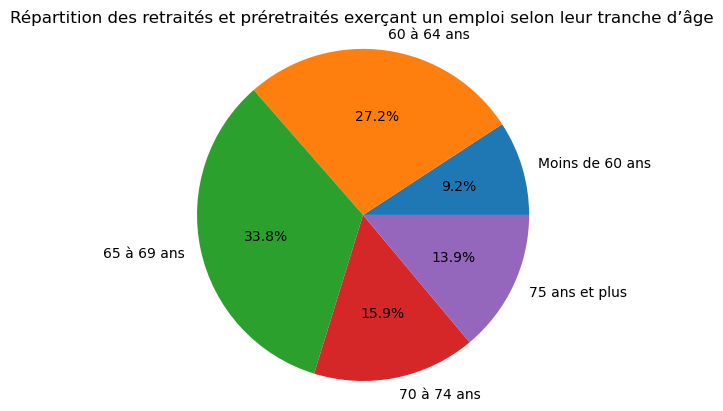

In [43]:
age_dist = df_concat[df_concat['Designation'].isin(['Moins de 60 ans', '60 à 64 ans', '65 à 69 ans', '70 à 74 ans', '75 ans et plus'])]
age_dist = age_dist.set_index('Designation').T
age_dist = age_dist.loc['France entière']
fig, ax = plt.subplots()
ax.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%')
ax.axis('equal')  # Pour un graphique à secteurs circulaire.
plt.title('Répartition des retraités et préretraités exerçant un emploi selon leur tranche d’âge')
st.pyplot(fig)

In [44]:
df_concat

,Designation,AUVERGNE-\nRHÔNE-ALPES,Ain,Allier,Ardèche,Cantal,Drôme,Isère,Loire,Haute-Loire,...,France métropolitaine,ANTILLES-GUYANE,Guadeloupe,Martinique,Guyane,OCEAN INDIEN,La Réunion,Mayotte,France entière,new_designation
0,Superficie en km²,69711.0,5762.0,7340.0,5529.0,5726.0,6530.0,7431.0,4781.0,4977.0,...,543962.83,86339.0,1705.0,1100.0,83534.0,2877.0,2503.0,374.0,633178.83,Superficie en km²
1,Population au 1er janvier 2019 (Recensement de...,8042936.0,652432.0,335975.0,328278.0,144692.0,516762.0,1271166.0,765634.0,227570.0,...,65096768.0,1030425.0,384239.0,364508.0,281678.0,1130789.0,861210.0,269579.0,67257982.00,Population au 1er janvier 2019 (Recensement de...
2,Population au 1er janvier 2022 (Estimation de ...,8153233.0,665391.0,331757.0,330865.0,143280.0,524506.0,1285915.0,767549.0,227224.0,...,65627454.0,1017748.0,372939.0,350373.0,294436.0,1168194.0,868846.0,299348.0,67813396.00,Population au 1er janvier 2022 (Estimation de ...
3,Population étrangère au 1er janvier 2019 (Rece...,553830.0,57984.0,11559.0,11874.0,2625.0,26696.0,81904.0,48845.0,5495.0,...,4603992.0,NaN,NaN,NaN,NaN,NaN,NaN,124618.0,NaN,Population étrangère au 1er janvier 2019 (Rece...
4,Projection de la population en 2050 en millier...,9472.0,841.0,353.0,384.0,143.0,597.0,1511.0,834.0,246.0,...,71622.0,997.0,330.0,282.0,385.0,1400.0,910.0,490.0,74019.00,Projection de la population en 2050 en millier...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Proportion parmi les retraités en cumul emploi...,16.24,15.05,10.22,12.53,9.34,15.85,17.62,16.06,10.67,...,18.85,9.7,10.08,9.07,10.42,NaN,15.55,NaN,18.76,Répartition des retraités et préretraités exer...
110,"Artisans, commerçants et chefs d'entreprise",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Répartition des retraités et préretraités exer...
111,Proportion parmi l'ensemble des actifs occupés...,7.18,6.78,7.24,9.29,7.91,8.34,6.81,7.15,8.53,...,6.66,9.28,11.0,8.55,7.63,NaN,7.54,NaN,6.70,Répartition des retraités et préretraités exer...
112,Proportion parmi les retraités en cumul emploi...,19.48,15.46,22.72,17.23,23.43,22.2,19.26,18.49,23.66,...,18.33,12.42,15.01,7.87,18.33,NaN,14.57,NaN,18.26,Répartition des retraités et préretraités exer...


In [45]:
index = df_region[df_region['Designation'] == "Espérance de vie à la naissance en 2021 (1) (3)"].index[0]
selected_rows = df_region.iloc[index+1:index+3]
variable_1 = selected_rows.iloc[0]
variable_2 = selected_rows.iloc[1]
df_hommes = pd.DataFrame(variable_1)
df_femmes = pd.DataFrame(variable_2)
df_hommes.columns = df_hommes.iloc[0]
df_femmes.columns = df_femmes.iloc[0]
df_hommes = df_hommes[1:]
df_femmes = df_femmes[1:]
df_h_f = df_hommes.join(df_femmes)
df_femmes.columns

Index(['Femmes'], dtype='object', name='Designation')

In [46]:
combined_df = df_hommes.join(df_femmes)
combined_df

Designation,Hommes,Femmes
AUVERGNE-\nRHÔNE-ALPES,80.9,86.1
BOURGOGNE-\nFRANCHE-COMTE,79.2,85.2
BRETAGNE,79.0,85.1
CENTRE - \nVAL DE LOIRE,79.3,85.0
GRAND EST,79.0,84.5
HAUTS-DE-FRANCE,77.1,83.6
ILE-DE-FRANCE,80.7,86.0
NORMANDIE,78.2,84.6
NOUVELLE-AQUITAINE,79.7,85.6
OCCITANIE,80.0,85.6


In [47]:
retirees_working = df_region[df_region['Designation'] == "Nombre de retraités et préretraités ayant un emploi"]
retirees_working

,Designation,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
81,Nombre de retraités et préretraités ayant un e...,37243.154,14185.865,13323.69,11810.49,25124.559,18865.66,55836.09,14211.08,30025.28,28437.294,12482.63,27951.691,2545.736,NaN


In [48]:
index = df_region[df_region['Designation'] == "Taux d'activité des 50 à 64 ans (en %)"].index[0]
df_chomeur = df_region.iloc[index+2]
df_chomeur = pd.DataFrame(df_chomeur)
df_chomeur.columns = df_chomeur.iloc[0]
df_chomeur = df_chomeur[1:]


retirees_working = df_region[df_region['Designation'] == "Part de retraités et préretraités parmi les personnes en emploi (en %)"]
retirees_working = retirees_working.drop(columns=['Designation']).T
retirees_working.columns = ['Retraités']
df_all = df_chomeur.join(retirees_working)
df_all = df_all.sort_values('Chômeurs', ascending=False)
df_all

,Chômeurs,Retraités
ANTILLES-GUYANE,13.81,0.779129
HAUTS-DE-FRANCE,7.67,0.829111
OCCITANIE,7.4,1.250422
ILE-DE-FRANCE,7.25,1.014557
PACA,7.2,1.431836
GRAND EST,6.76,1.111942
CENTRE - \nVAL DE LOIRE,6.28,1.146001
NOUVELLE-AQUITAINE,6.23,1.264951
BOURGOGNE-\nFRANCHE-COMTE,6.19,1.265867
NORMANDIE,6.15,1.084297


In [75]:
index = df_region[df_region['Designation'] == "Répartition des retraités et préretraités exerçant un emploi selon leur catégorie socioprofessionnelle en %"].index[0]
df_retraite = df_region.iloc[index:-1]
df_retraite_clean = df_retraite.dropna(how='all')
# Créez un nouveau DataFrame pour stocker les données nécessaires
heatmap_data = pd.DataFrame()

# Stockez la catégorie actuelle (sera mise à jour à chaque nouvelle catégorie rencontrée)
current_category = ""

# Parcourez chaque ligne du DataFrame nettoyé
for i, row in df_retraite_clean.iterrows():
    # Si la ligne est une catégorie (ne contient pas "Proportion"), mettez à jour la catégorie actuelle
    if "Proportion" not in row['Designation']:
        current_category = row['Designation']
    # Sinon, si la ligne contient les proportions pour les retraités en cumul emploi-retraite, ajoutez ces données au nouveau DataFrame
    elif "Proportion parmi les retraités en cumul emploi-retraite" in row['Designation']:
        heatmap_data[current_category] = row[1:]
        
# Transposez le DataFrame pour que les catégories deviennent des colonnes et les régions deviennent des lignes
heatmap_data = heatmap_data.T


df_retraite = heatmap_data

# DataFrame avec les latitudes et les longitudes des plus grandes villes de chaque région
df_cities = pd.DataFrame({
    'Region': ['AUVERGNE-\nRHÔNE-ALPES', 'BOURGOGNE-\nFRANCHE-COMTE', 'BRETAGNE', 'CENTRE - \nVAL DE LOIRE', 'GRAND EST', 'HAUTS-DE-FRANCE ', 'ILE-DE-FRANCE', 'NORMANDIE', 'NOUVELLE-AQUITAINE', 'OCCITANIE', 'PAYS DE LA LOIRE', ' PACA  ', 'ANTILLES-GUYANE', 'OCEAN INDIEN'],
    'Latitude': [45.75, 47.32, 48.11, 47.9, 48.69, 50.63, 48.85, 49.49, 44.84, 43.6, 47.22, 43.70, 16.24, -20.88], # Lyon, Dijon, Rennes, Orléans, Strasbourg, Lille, Paris, Rouen, Bordeaux, Toulouse, Nantes, Marseille, Basse-Terre, Saint-Denis
    'Longitude': [4.85, 5.04, -1.68, 1.9, 7.75, 3.07, 2.35, 1.10, -0.58, 1.44, -1.55, 5.40, -61.54, 55.45] # Coordonnées approximatives
})

total = df_retraite.sum()
# Créer une nouvelle colonne dans df_cities qui correspond aux index de la série total
df_cities.set_index('Region', inplace=True)
df_cities['total'] = total

# Remettre l'index à zéro
df_cities.reset_index(inplace=True)
df_cities = df_cities.fillna(0)

heatmap_data

,AUVERGNE-\nRHÔNE-ALPES,BOURGOGNE-\nFRANCHE-COMTE,BRETAGNE,CENTRE - \nVAL DE LOIRE,GRAND EST,HAUTS-DE-FRANCE,ILE-DE-FRANCE,NORMANDIE,NOUVELLE-AQUITAINE,OCCITANIE,PAYS DE LA LOIRE,PACA,ANTILLES-GUYANE,OCEAN INDIEN
Employés,25.63,26.19,25.94,26.73,26.02,26.29,20.05,25.26,23.78,22.4,25.53,26.02,31.08,NaN
Professions Intermédiaires,17.44,15.43,15.88,15.01,16.74,17.84,19.39,15.53,14.52,16.35,16.29,16.74,20.04,NaN
Ouvriers,18.37,22.02,19.36,22.2,22.85,21.8,12.58,19.75,20.82,16.78,20.45,22.85,22.23,NaN
Agriculteurs exploitants,2.85,3.7,4.97,3.49,3.35,2.82,0.45,5.7,5.7,6.27,4.72,3.35,4.53,NaN
Cadres et professions intellectuelles supérieures,16.24,13.09,16.72,15.42,13.6,14.95,31.65,15.41,15.15,17.45,16.26,13.6,9.7,NaN
"Artisans, commerçants et chefs d'entreprise",19.48,19.58,17.13,17.16,17.45,16.29,15.89,18.35,20.03,20.75,16.76,17.45,12.42,NaN


In [85]:
index = df_region[df_region['Designation'] == "Espérance de vie à 65 ans en 2021 (1) (3)"].index[0]
df_vie = df_region.iloc[index+1:index+3]
df_vie = df_vie.mean()
#df_vie = df_vie.dropna(how='all')

# DataFrame avec les latitudes et les longitudes des plus grandes villes de chaque région
df_cities = pd.DataFrame({
    'Region': ['AUVERGNE-\nRHÔNE-ALPES', 'BOURGOGNE-\nFRANCHE-COMTE', 'BRETAGNE', 'CENTRE - \nVAL DE LOIRE', 'GRAND EST', 'HAUTS-DE-FRANCE ', 'ILE-DE-FRANCE', 'NORMANDIE', 'NOUVELLE-AQUITAINE', 'OCCITANIE', 'PAYS DE LA LOIRE', ' PACA  ', 'ANTILLES-GUYANE', 'OCEAN INDIEN'],
    'Latitude': [45.75, 47.32, 48.11, 47.9, 48.69, 50.63, 48.85, 49.49, 44.84, 43.6, 47.22, 43.70, 16.24, -20.88], # Lyon, Dijon, Rennes, Orléans, Strasbourg, Lille, Paris, Rouen, Bordeaux, Toulouse, Nantes, Marseille, Basse-Terre, Saint-Denis
    'Longitude': [4.85, 5.04, -1.68, 1.9, 7.75, 3.07, 2.35, 1.10, -0.58, 1.44, -1.55, 5.40, -61.54, 55.45] # Coordonnées approximatives
})

total = df_vie
# Créer une nouvelle colonne dans df_cities qui correspond aux index de la série total
df_cities.set_index('Region', inplace=True)
df_cities['total'] = total

# Remettre l'index à zéro
df_cities = df_cities.fillna(0)


# Remettre l'index à zéro
df_cities.reset_index(inplace=True)
#df_cities = df_cities.fillna(0)
# Création du layer pour la carte
layer = pdk.Layer(
    "ScatterplotLayer",
    df_cities,
    pickable=True,
    opacity=0.8,
    stroked=True,
    filled=True,
    radius_scale=6,
    radius_min_pixels=10,
    radius_max_pixels=100,
    line_width_min_pixels=1,
    get_position=["Longitude", "Latitude"],
    get_radius="total",  # la taille des points dépendra de la somme totale de la proportion des retraités en cumul emploi-retraite
    get_fill_color=[255, 140, 0],
    get_line_color=[0, 0, 0],
)
label_layer = pdk.Layer(
    "TextLayer",
    df_cities,
    pickable=True,
    get_position=["Longitude", "Latitude"],
    get_text="total",  # Les valeurs chiffrées que vous souhaitez afficher
    get_color=[12, 0, 0],
    get_size=15,
    get_alignment_baseline="'bottom'",
)

# Initialiser la vue
view_state = pdk.ViewState(latitude=48.8566, longitude=2.3522, zoom=5, max_zoom=15, pitch=40.5, bearing=-27.36)

# Rendre le deck
r = pdk.Deck(layers=[layer, label_layer], initial_view_state=view_state)
#st.pydeck_chart(r)
df_cities

/var/folders/dm/15rqkpmx2610wdqm5g8tlvpr0000gn/T/ipykernel_15993/3456824205.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_vie = df_vie.mean()


,Region,Latitude,Longitude,total
0,AUVERGNE-\nRHÔNE-ALPES,45.75,4.85,21.55
1,BOURGOGNE-\nFRANCHE-COMTE,47.32,5.04,20.95
2,BRETAGNE,48.11,-1.68,21.20
3,CENTRE - \nVAL DE LOIRE,47.90,1.90,21.05
4,GRAND EST,48.69,7.75,20.45
5,HAUTS-DE-FRANCE,50.63,3.07,19.65
6,ILE-DE-FRANCE,48.85,2.35,21.55
7,NORMANDIE,49.49,1.10,20.70
8,NOUVELLE-AQUITAINE,44.84,-0.58,21.50
9,OCCITANIE,43.60,1.44,21.45


In [87]:
df_cities.values

array([['AUVERGNE-\nRHÔNE-ALPES', 45.75, 4.85, 21.549999999999997],
       ['BOURGOGNE-\nFRANCHE-COMTE', 47.32, 5.04, 20.95],
       ['BRETAGNE', 48.11, -1.68, 21.2],
       ['CENTRE - \nVAL DE LOIRE', 47.9, 1.9, 21.05],
       ['GRAND EST', 48.69, 7.75, 20.450000000000003],
       ['HAUTS-DE-FRANCE ', 50.63, 3.07, 19.65],
       ['ILE-DE-FRANCE', 48.85, 2.35, 21.55],
       ['NORMANDIE', 49.49, 1.1, 20.7],
       ['NOUVELLE-AQUITAINE', 44.84, -0.58, 21.5],
       ['OCCITANIE', 43.6, 1.44, 21.450000000000003],
       ['PAYS DE LA LOIRE', 47.22, -1.55, 21.7],
       [' PACA  ', 43.7, 5.4, 21.0],
       ['ANTILLES-GUYANE', 16.24, -61.54, 0.0],
       ['OCEAN INDIEN', -20.88, 55.45, 0.0]], dtype=object)